<a href="https://colab.research.google.com/github/jtneumann/DL-Basketball/blob/master/BB_LP2_wk1_trial6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt


3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


In [2]:
#Create Model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, mode='min')
def build_model():
    model = keras.models.Sequential([
        #using 512 layers, used 32 first, then 16 in trial 2
        keras.layers.Dense(512, activation='relu', input_shape=[4]),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1)
    ])

    o = keras.optimizers.RMSprop()
    m = [
           keras.metrics.MeanAbsoluteError(),
           keras.metrics.Accuracy(),
           keras.metrics.MeanSquaredError()
    ]

    L = keras.losses.MeanSquaredError()

    model.compile(loss=L, optimizer=o, metrics=m)
    return model

bb_model = build_model()



In [3]:
import io
from google.colab import files
uploaded = files.upload()


Saving Games-Calculated.csv to Games-Calculated.csv


In [4]:
column_names = ['Date','HomeTeam','HomeScore','AwayTeam','AwayScore',
                'HomeScoreAverage','HomeDefenseAverage','AwayScoreAverage','AwayDefenseAverage',
                'Result']

game_data = pd.read_csv((io.BytesIO(uploaded['Games-Calculated.csv'])), header=None, names=column_names)

In [5]:
# Drop the columns that we are NOT going to train on
game_data.drop(['Date','HomeTeam','HomeScore','AwayTeam','AwayScore'], axis=1, inplace=True)
game_data.tail()

,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage,Result
20155,80.058824,63.529412,67.777778,70.666667,2
20156,85.062500,74.562500,71.466667,75.200000,10
20157,71.437500,65.500000,67.388889,72.666667,-8
20158,80.666667,72.333333,70.200000,70.066667,7
20159,83.238095,72.761905,75.428571,78.214286,12


In [6]:
game_data.head()


,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage,Result
0,87.0,76.0,76.0,87.0,11
1,70.0,50.0,50.0,70.0,20
2,70.0,57.0,57.0,70.0,13
3,89.0,83.0,83.0,89.0,6
4,68.0,62.0,62.0,68.0,6


In [7]:
#Train/Test Spit
training_set = game_data.sample(frac=0.8, random_state=0)
test_set = game_data.drop(training_set.index)
print('training_set_size: %s' % training_set.shape[0])
print('test_set_size: %s' % test_set.shape[0])

training_set_size: 16128
test_set_size: 4032


In [8]:
training_set.head()


,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage,Result
5951,81.800000,64.400000,68.800000,81.000000,5
15481,64.333333,68.000000,74.500000,81.500000,6
16660,92.714286,70.714286,72.000000,71.800000,5
4896,74.095238,66.047619,62.384615,84.076923,17
12061,82.363636,66.090909,67.600000,75.400000,-2


In [9]:
#Labels
training_labels = training_set.pop('Result')
test_labels = test_set.pop('Result')

In [10]:
training_set.head()

,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage
5951,81.800000,64.400000,68.800000,81.000000
15481,64.333333,68.000000,74.500000,81.500000
16660,92.714286,70.714286,72.000000,71.800000
4896,74.095238,66.047619,62.384615,84.076923
12061,82.363636,66.090909,67.600000,75.400000


In [11]:
#Normalize Data
mean = training_set.mean(axis=0)
train_data = training_set - mean
std = train_data.std(axis=0)
train_data /= std

test_data = test_set - mean
test_data /= std

In [12]:
history = bb_model.fit(x=train_data, y=training_labels, epochs=10, verbose=1, validation_data=(test_data, test_labels))

Epoch 1/10
504/504 [==============================] - 5s 3ms/step - loss: 116.0137 - mean_absolute_error: 8.3553 - accuracy: 0.0000e+00 - mean_squared_error: 116.0137 - val_loss: 106.5598 - val_mean_absolute_error: 8.0144 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 106.5598
Epoch 2/10
504/504 [==============================] - 1s 3ms/step - loss: 103.1826 - mean_absolute_error: 7.9384 - accuracy: 0.0000e+00 - mean_squared_error: 103.1826 - val_loss: 105.7471 - val_mean_absolute_error: 7.9222 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 105.7471
Epoch 3/10
504/504 [==============================] - 1s 3ms/step - loss: 105.2570 - mean_absolute_error: 7.9967 - accuracy: 0.0000e+00 - mean_squared_error: 105.2570 - val_loss: 104.6743 - val_mean_absolute_error: 7.8872 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 104.6743
Epoch 4/10
504/504 [==============================] - 1s 3ms/step - loss: 102.9934 - mean_absolute_error: 7.9029 - accuracy: 0.0000e+00 - mean_squar

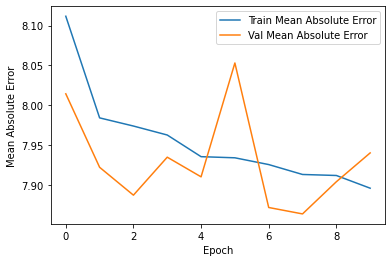

In [13]:
# Check the results
# Create a DataFrame from the output from the fit method
hist = pd.DataFrame(history.history)
# Create an epoch column and set it to the epoch index
hist['epoch'] = history.epoch

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history['epoch'], history['mean_absolute_error'],
           label='Train Mean Absolute Error')
  plt.plot(history['epoch'], history['val_mean_absolute_error'],
           label = 'Val Mean Absolute Error')
  plt.legend()
  #plt.ylim([0,1])
  plt.show()

plot_history(hist)

In [14]:
history = bb_model.fit(x=train_data, y=training_labels, epochs=50, verbose=1, validation_data=(test_data, test_labels), callbacks=[callback])

Epoch 1/50
504/504 [==============================] - 1s 3ms/step - loss: 102.7625 - mean_absolute_error: 7.8890 - accuracy: 0.0000e+00 - mean_squared_error: 102.7625 - val_loss: 106.3523 - val_mean_absolute_error: 8.0287 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 106.3523
Epoch 2/50
504/504 [==============================] - 1s 3ms/step - loss: 103.0071 - mean_absolute_error: 7.9012 - accuracy: 0.0000e+00 - mean_squared_error: 103.0071 - val_loss: 104.4318 - val_mean_absolute_error: 7.9072 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 104.4318
Epoch 3/50
504/504 [==============================] - 1s 3ms/step - loss: 102.7683 - mean_absolute_error: 7.8835 - accuracy: 0.0000e+00 - mean_squared_error: 102.7683 - val_loss: 104.2703 - val_mean_absolute_error: 7.8611 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 104.2703
Epoch 4/50
504/504 [==============================] - 1s 3ms/step - loss: 102.8148 - mean_absolute_error: 7.8920 - accuracy: 0.0000e+00 - mean_squar

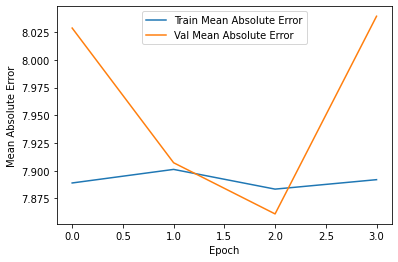

In [15]:
# Check the results
# Create a DataFrame from the output from the fit method
hist = pd.DataFrame(history.history)
# Create an epoch column and set it to the epoch index
hist['epoch'] = history.epoch

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history['epoch'], history['mean_absolute_error'],
           label='Train Mean Absolute Error')
  plt.plot(history['epoch'], history['val_mean_absolute_error'],
           label = 'Val Mean Absolute Error')
  plt.legend()
  #plt.ylim([0,1])
  plt.show()

plot_history(hist)

In [16]:
history.history

{'accuracy': [0.0, 0.0, 0.0, 0.0],
 'loss': [102.76253509521484,
  103.00708770751953,
  102.76831817626953,
  102.81475067138672],
 'mean_absolute_error': [7.888998031616211,
  7.901230335235596,
  7.883453845977783,
  7.891979217529297],
 'mean_squared_error': [102.76253509521484,
  103.00708770751953,
  102.76831817626953,
  102.81475067138672],
 'val_accuracy': [0.0, 0.0, 0.0, 0.0],
 'val_loss': [106.35226440429688,
  104.43175506591797,
  104.27029418945312,
  105.93236541748047],
 'val_mean_absolute_error': [8.028677940368652,
  7.907235622406006,
  7.861095428466797,
  8.039336204528809],
 'val_mean_squared_error': [106.35226440429688,
  104.43175506591797,
  104.27029418945312,
  105.93236541748047]}

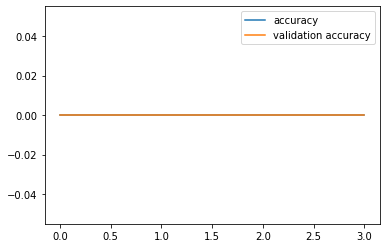

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

In [22]:
bb_model.save('bb_model_wk1.h5')

In [23]:
res = bb_model.evaluate(x=test_data, y=test_labels, verbose=1, callbacks=[callback])

126/126 [==============================] - 0s 2ms/step - loss: 105.9324 - mean_absolute_error: 8.0393 - accuracy: 0.0000e+00 - mean_squared_error: 105.9324


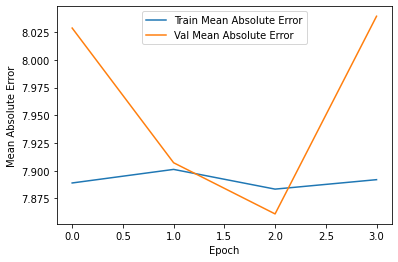

In [24]:
# Check the results
# Create a DataFrame from the output from the fit method
hist = pd.DataFrame(history.history)
# Create an epoch column and set it to the epoch index
hist['epoch'] = history.epoch

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history['epoch'], history['mean_absolute_error'],
           label='Train Mean Absolute Error')
  plt.plot(history['epoch'], history['val_mean_absolute_error'],
           label = 'Val Mean Absolute Error')
  plt.legend()
  #plt.ylim([0,1])
  plt.show()

plot_history(hist)

In [ ]:

/content/bb_model_wk1.h5